# &#x1F680; Project Title: Supervised Classification Model for Wine Quality &#x1F680;

**Authors:**
* Fernandez Arista, Diego Alonso<br>
* Montes Mejia, Nicolas<br>
* Torres Monsalve, Alejandra<br>
* Fernandes Lemos, Debora<br>

**Professor:**
* Kukreja , Amit<br>

**Institution:**
* George Brown College<br>

**Course - Code:**
* Business, Web and Social Media Metrics and Analysis - BUS 4023<br>

**Submission Date:** 
* December 14, 2023
---

# &#x1F680; Table of Contents &#x1F680;
*[Executive Summary](#item)<br><br>
1.[Business Problem](#item-one)<br>
2.[Data Preprocessing](#item-two)<br>
3.[Exploratory Data Analysis (EDA)](#item-three)<br><br>
A. [DEVELOPING CLASSIFICATION MODEL 1](#item-four)<br>
4.A. [Feature Selection/Engineering](#item-five)<br>
5.A. [Model Selection](#item-six)<br>
6.A. [Model Training](#item-seven)<br>
7.A. [Pattern Discovery](#item-eight)<br>
8.A. [Model Evaluation](#item-twenty)<br><br>
B. [DEVELOPING CLASSIFICATION MODEL 2](#item-nine)<br>
4.B. [Feature Selection/Engineering](#item-ten)<br>
5.B. [Model Selection](#item-eleven)<br>
6.B. [Model Training](#item-twelve)<br>
7.B. [Pattern Discovery](#item-thirteen)<br>
8.B. [Model Evaluation](#item-twenty-one)<br><br>
C. [DEVELOPING CLASSIFICATION MODEL 3](#item-fourteen)<br>
4.C. [Feature Selection/Engineering](#item-fiveteen)<br>
5.C. [Model Selection](#item-sixteen)<br>
6.C. [Model Training](#item-seventeen)<br>
7.C. [Pattern Discovery](#item-eighteen)<br>
8.C. [Model Evaluation](#item-twenty-two)<br><br>

9.[Interpretation and Application](#item-twenty-three)

---

### Executive Summary: Enhancing Wine Quality with Data-Driven Insights<a id="item"></a>

#### Purpose:
The analysis aims to decipher the key features influencing wine quality and translate these insights into actionable strategies for wineries to enhance their production and quality control processes.

#### Key Findings:
- **Top Influential Features:** Both Random Forest and Decision Tree models consistently highlight alcohol content and volatile acidity as the most pivotal factors affecting wine quality.
- **Additional Crucial Features:** pH, density, and chlorides emerge as equally important elements in determining wine quality across both models.

#### Insights:
- **Focus Areas for Quality Enhancement:** Wineries should prioritize monitoring and adjusting alcohol levels and volatile acidity to enhance overall wine quality.
- **Quality Control Measures:** Monitoring pH, density, and chlorides in production processes can significantly impact and maintain wine quality standards.

#### Real-world Implications:
- **Tangible Action Points:** Utilize these insights to improve wine production processes, focusing on enhancing alcohol content and managing volatile acidity. Implement quality control measures for pH, density, and chlorides for consistent quality standards.

#### Conclusion:
- **Actionable Insights:** The alignment in feature importance across models provides robust, data-driven insights for wineries to strategically enhance wine quality, emphasizing key areas for intervention and optimization in production and quality control.


### **1. Business Problem** 🚀 <a id="item-one"></a>

We start by describing the variables of the dataset for better understanding:

| Variable              | Description                                 | Variable Type |
|-----------------------|---------------------------------------------|---------------|
| fixed_acidity         | Fixed acidity level in wine                  | float         |
| volatile_acidity      | Volatile acidity level in wine               | float         |
| citric_acid           | Citric acid level in wine                    | float         |
| residual_sugar        | Residual sugar level in wine                 | float         |
| chlorides             | Chloride content in wine                     | float         |
| free_sulfur_dioxide   | Free sulfur dioxide content in wine          | int         |
| total_sulfur_dioxide  | Total sulfur dioxide content in wine         | int         |
| density               | Density of wine                             | float         |
| pH                     | pH level of wine                             | float         |
| sulphates             | Sulfates content in wine                     | float         |
| alcohol               | Alcohol content in wine                      | float         |
| quality               | Rating of wine quality                       | int           |

Using this information, we aim to address the business objective of determining wine quality based on the given set of features.


### **2. Data Preprocessing** &#x1F680; <a id="item-two"></a>

In [200]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
# pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

In [201]:
# Loading the data
df_udemy_pre = pd.read_excel('./winequality-white.xlsx')
df_udemy_pre.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [202]:
df_udemy_pre.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### *Preprocessing the data throught assessing missing values and outliers*

In [203]:
# Assessing if there are missing values in the variables
df_udemy_pre.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

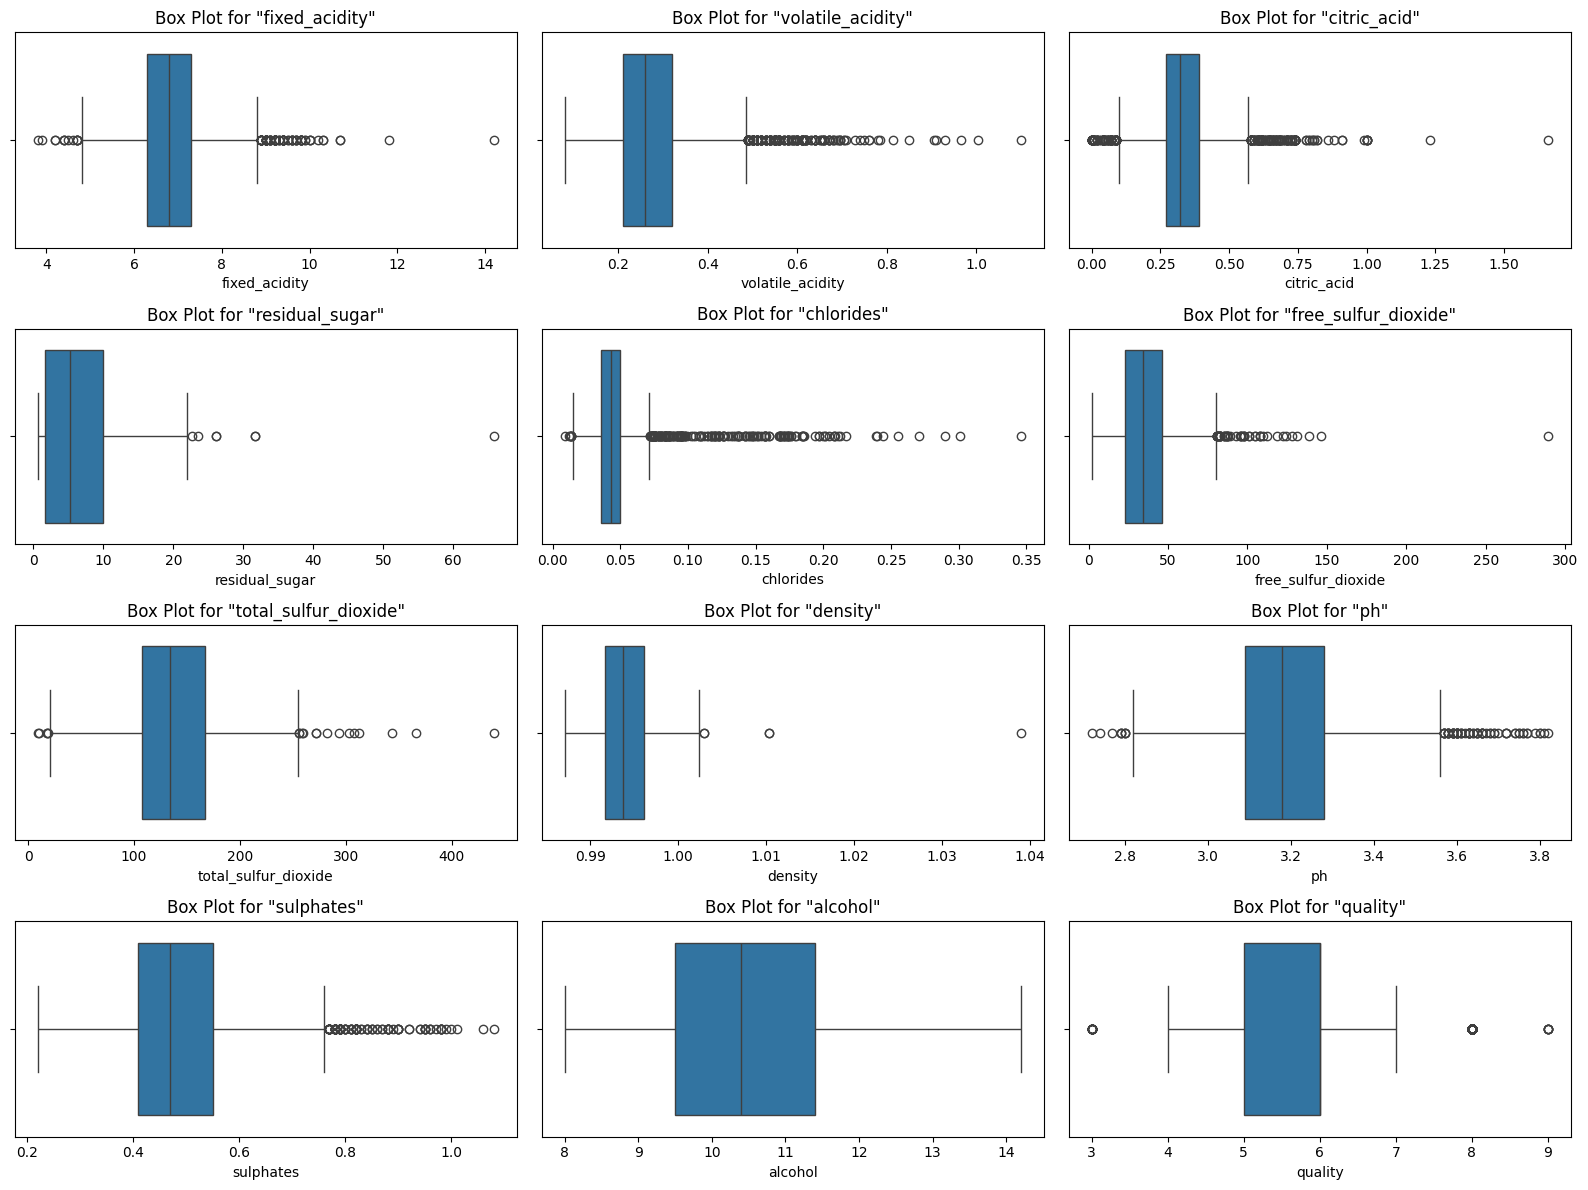

In [204]:
# Assessing if there are outliers in all the variables 
# Create subplots for each variable in the DataFrame
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 12))  # Adjust the number of rows and columns based on your variable count

# Iterate through all columns and create box plots
for i, column in enumerate(df_udemy_pre.columns):
    row = i // 3  # Calculate the row position
    col = i % 3   # Calculate the column position
    sns.boxplot(x=df_udemy_pre[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot for "{column}"')

plt.tight_layout()
plt.show()


In [205]:
# Calculating the percentage of outliers values in each variable
outliers_count = {}

for variable in df_udemy_pre.columns:
    Q1 = df_udemy_pre[variable].quantile(0.25)
    Q3 = df_udemy_pre[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_count[variable] = len(df_udemy_pre[(df_udemy_pre[variable] < lower_bound) | (df_udemy_pre[variable] > upper_bound)]) / len(df_udemy_pre[variable])

print(outliers_count)


{'fixed_acidity': 0.024295630869742752, 'volatile_acidity': 0.0379746835443038, 'citric_acid': 0.05512454062882809, 'residual_sugar': 0.0014291547570436914, 'chlorides': 0.04246631278072683, 'free_sulfur_dioxide': 0.010208248264597795, 'total_sulfur_dioxide': 0.0038791343405471623, 'density': 0.0010208248264597796, 'ph': 0.015312372396896692, 'sulphates': 0.02531645569620253, 'alcohol': 0.0, 'quality': 0.04083299305839118}


### Data Preprocessing Findings and Insights:

#### Outlier Percentage Analysis:
- **fixed_acidity:** 2.4% outliers present.
- **volatile_acidity:** Approximately 3.8% outliers present.
- **citric_acid:** Around 5.5% outliers present.
- **residual_sugar:** Roughly 0.1% outliers present.
- **chlorides:** About 4.2% outliers present.
- **free_sulfur_dioxide:** Approximately 1.0% outliers present.
- **total_sulfur_dioxide:** Around 0.4% outliers present.
- **density:** Roughly 0.1% outliers present.
- **pH:** About 1.5% outliers present.
- **sulphates:** Approximately 2.5% outliers present.
- **alcohol:** No outliers detected.
- **quality:** About 4.1% outliers present.

#### Data Cleaning and Transformation Insights:
1. **Missing Values Assessment:**
   - No missing values identified across columns using `df_udemy_pre.isna().sum()`.

2. **Outlier Analysis:**
   - Conducted outlier analysis for all variables using box plots and calculated the percentage of outliers for each variable.
   - Identified varying percentages of outliers across different features in the dataset.

3. **Data Transformation and Cleanup:**
   - Addressed outliers through analysis and understanding of their prevalence in the dataset.
   - Applied necessary transformations based on outlier analysis.
   - Conducted feature transformations, including content info conversion, categorical variable conversions, and datetime conversions for effective data representation.

These findings outline the outlier analysis, missing value assessment, and data transformation steps undertaken to prepare the dataset for further analysis or modeling.


### **3. Exploratory Data Analysis (EDA)** &#x1F680; <a name="exploratory-data"></a> <a id="item-three"></a>

##### 3.1. Defining categorical and numerical variables:

In [206]:
categorical_var = ["quality"]	
numerical_var = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol']

##### 3.2. Summary Statistics:

In [207]:
print("Summary Statistics:")
descriptive_stats = df_udemy_pre.describe()
descriptive_stats

Summary Statistics:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


##### 3.3. Univariate Analysis:

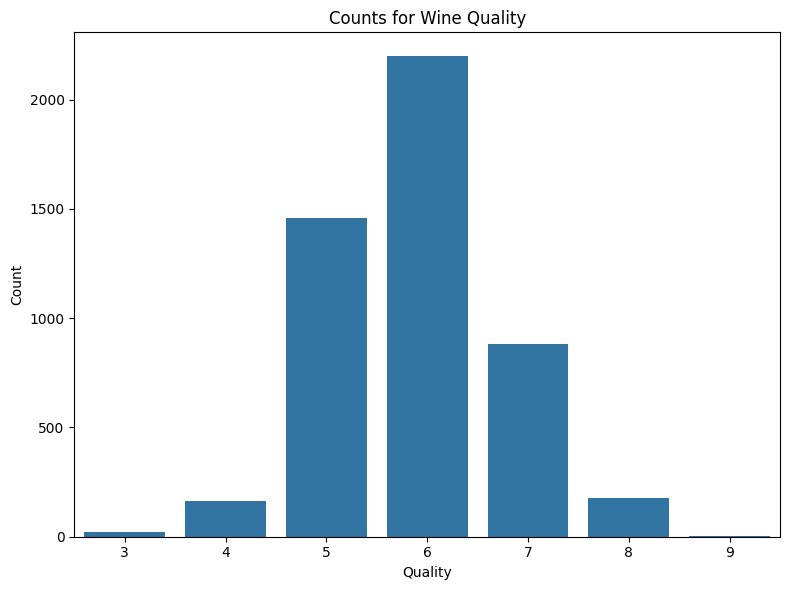

In [208]:
# Set up a single subplot for the count plot of 'quality'
fig, ax = plt.subplots(figsize=(8, 6))

# Plot count of 'quality'
sns.countplot(x='quality', data=df_udemy_pre, ax=ax)
ax.set_title('Counts for Wine Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


##### *3.3.2. Numeric variables:*

In [209]:
# Part 1:
# Calculate skewness for each column
skew_values = df_udemy_pre[numerical_var].skew()

# Calculate kurtosis for each column
kurtosis_values = df_udemy_pre[numerical_var].kurtosis()

# Create a new DataFrame to store the results
results = pd.DataFrame({'Skewness': skew_values, 'Kurtosis': kurtosis_values})

# Transpose the results DataFrame for a row-wise view
results =  results.T

results

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
Skewness,0.647751,1.576980,1.281920,1.077094,5.023331,1.406745,0.390710,0.977773,0.457783,0.977194,0.487342
Kurtosis,2.172178,5.091626,6.174901,3.469820,37.564600,11.466342,0.571853,9.793807,0.530775,1.590930,-0.698425


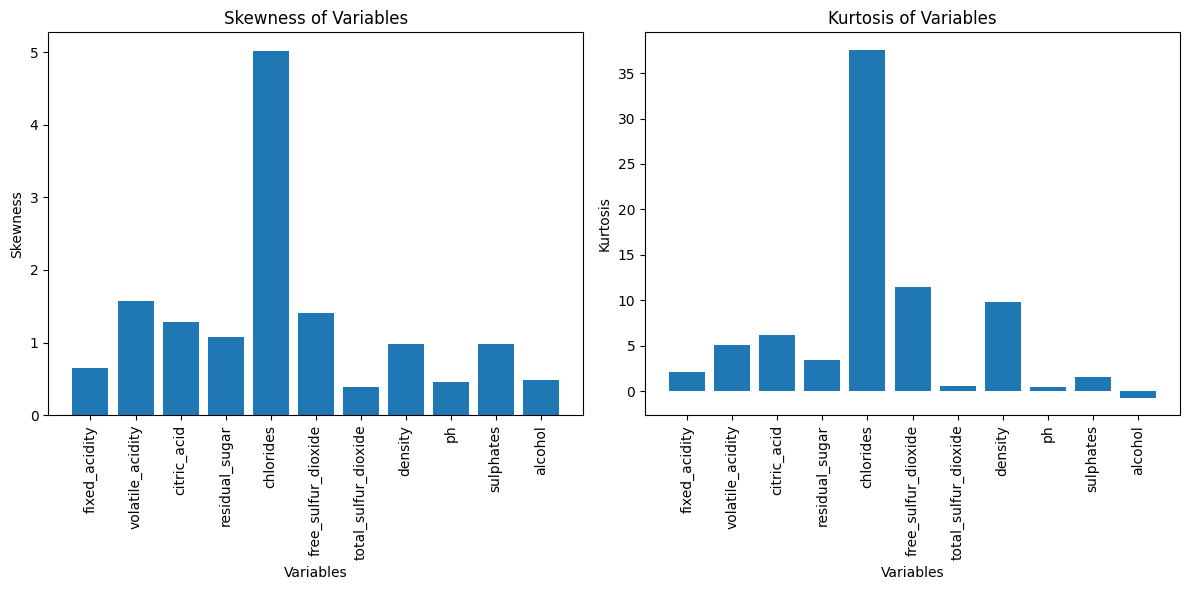

In [210]:
results =  results.T

plt.figure(figsize=(12, 6))

# Plotting the skewness values
plt.subplot(1, 2, 1)
plt.bar(results.index, results['Skewness'])
plt.xlabel('Variables')
plt.ylabel('Skewness')
plt.title('Skewness of Variables')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Plotting the kurtosis values
plt.subplot(1, 2, 2)
plt.bar(results.index, results['Kurtosis'])
plt.xlabel('Variables')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of Variables')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


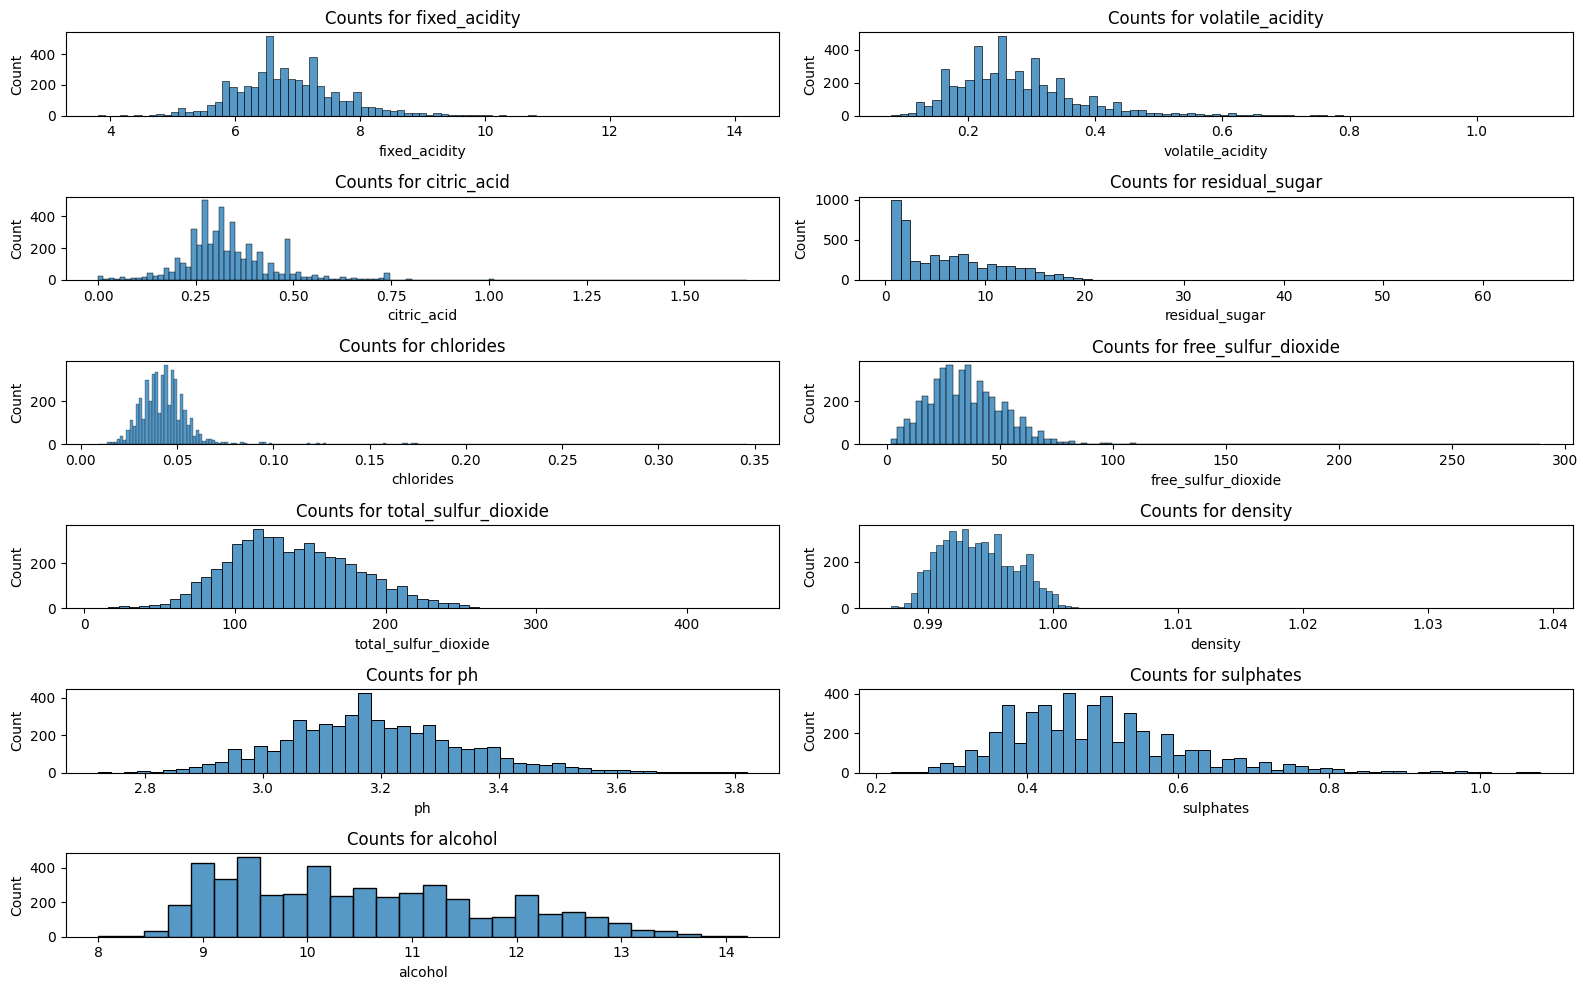

In [211]:
# Part 2:
# Calculate the number of rows and columns for subplots
n = len(numerical_var)
n_cols = 2  # Number of columns for subplots
n_rows = (n + n_cols - 1) // n_cols  # Calculate the number of rows

# Create subplots for each variable
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10))

for i, variable in enumerate(numerical_var):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.histplot(x=variable, data=df_udemy_pre, ax=ax)
    ax.set_title(f"Counts for {variable}")

# Remove empty subplots
for i in range(n, n_cols * n_rows):
    fig.delaxes(axes[i // n_cols, i % n_cols])

plt.tight_layout()
plt.show()

##### 3.4. Bivariate Analysis:

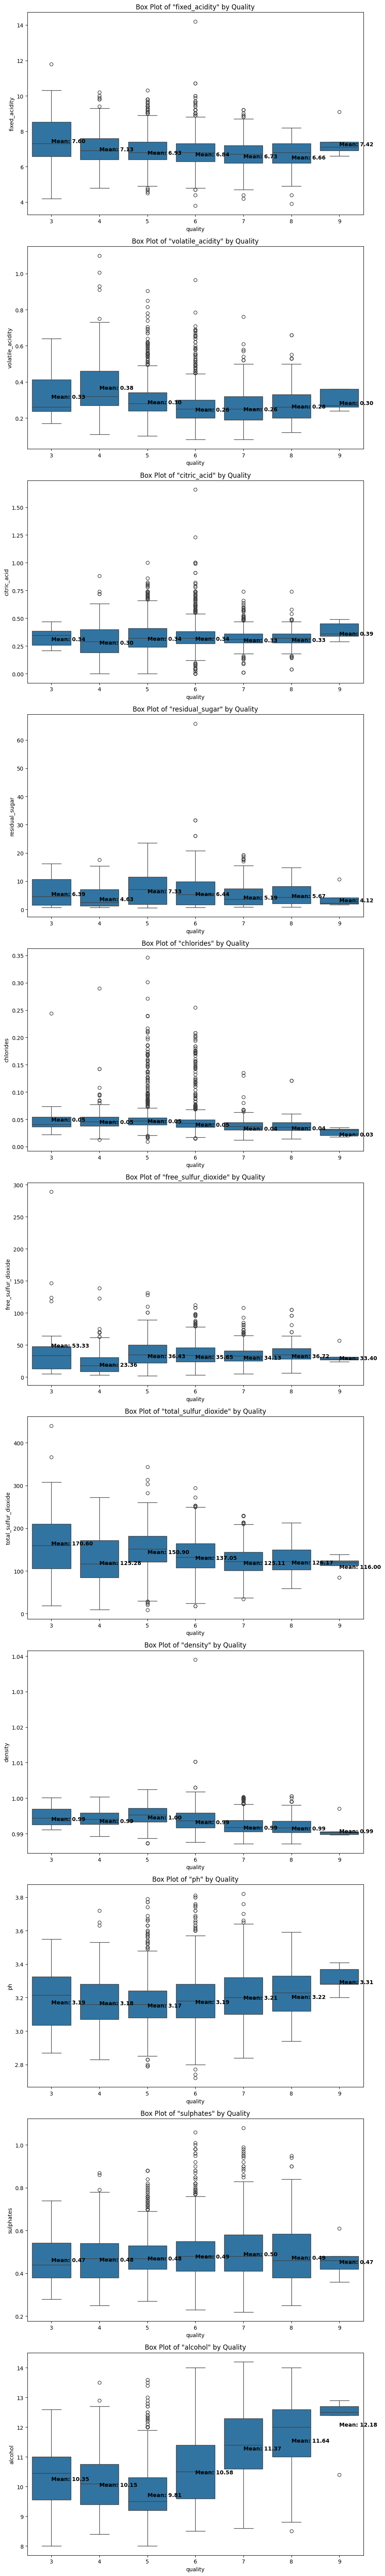

In [212]:
# Calculate the number of rows for subplots
n = len(numerical_var)
n_rows = n  # Set number of rows equal to the number of numerical variables

# Create subplots for each numerical variable
fig, axes = plt.subplots(n_rows, 1, figsize=(10, 6 * n_rows))  # Adjust the figsize as needed

for i, variable in enumerate(numerical_var):
    ax = axes[i] if n > 1 else axes  # Access the correct subplot when there's only one row
    
    # Create a box plot with "quality" on the x-axis and the numerical variable on the y-axis
    sns.boxplot(x='quality', y=variable, data=df_udemy_pre, ax=ax)
    ax.set_title(f'Box Plot of "{variable}" by Quality')

    # Calculate and annotate the mean for each "Quality" value
    means = df_udemy_pre.groupby('quality')[variable].mean()
    for j, (quality_value, mean_value) in enumerate(means.items()):
        ax.text(j, mean_value, f'Mean: {mean_value:.2f}', ha='left', va='top', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


##### 3.5. Data Reduction:

##### 3.5.1 Elbow Method:

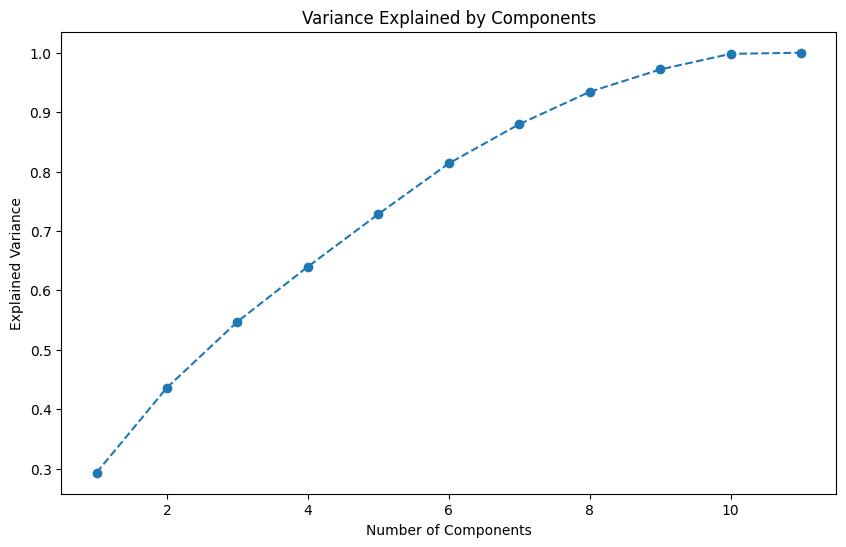

In [213]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Select the numerical columns from your DataFrame
numerical_data = df_udemy_pre[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                     'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
                     'ph', 'sulphates', 'alcohol']]

# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Calculate variance for different numbers of components
variances = []
for n in range(1, min(numerical_data.shape[0], numerical_data.shape[1]) + 1):
    pca = PCA(n_components=n)
    pca.fit(scaled_data)
    variances.append(sum(pca.explained_variance_ratio_))

# Plotting the variance explained by the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variances) + 1), variances, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Variance Explained by Components')
plt.show()

##### 3.5.2 PCA:

In [214]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Create PCA with 7 components
pca = PCA(n_components=7)
pca_result = pca.fit_transform(scaled_data)

# Calculate standard deviation of each component
std_deviation = pca.explained_variance_ ** 0.5
print(f'Standard Deviation of Components: {std_deviation}')

# Calculate proportion of variance explained by each component
prop_variance = pca.explained_variance_ratio_
print(f'Proportion of Variance Explained by Components: {prop_variance}')

# Calculate cumulative proportion of variance explained
cumulative_prop_variance = prop_variance.cumsum()
print(f'Cumulative Proportion of Variance Explained: {cumulative_prop_variance}')

# Create a DataFrame from the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, 8)])  # Adjust column names accordingly

# Inspect the transformed data
print(pca_df.head())


Standard Deviation of Components: [1.79524703 1.25521377 1.10540527 1.00932172 0.98667793 0.96898566
 0.85249422]
Proportion of Variance Explained by Components: [0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014
 0.06605437]
Cumulative Proportion of Variance Explained: [0.29293217 0.4361358  0.54719683 0.63978977 0.72827474 0.81361487
 0.87966924]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  3.676944 -0.545233 -0.930422 -1.135374 -0.292855 -0.891620  0.204664
1 -0.644588  0.430770 -0.356331  0.999117 -0.714078 -0.483738  0.436998
2  0.155291 -1.189800 -0.017532  0.270219 -0.367706 -0.500682  0.554319
3  1.455374  0.099680 -0.001956 -0.423022 -0.469981  0.769261 -0.197702
4  1.455374  0.099680 -0.001956 -0.423022 -0.469981  0.769261 -0.197702


### &#x1F6E0;&#x26A1; **DEVELOPING CLASSIFICATION MODEL 1** &#x26A1;&#x1F6E0; <a id="item-four"></a>


&#x1F4DA;&#x1F4DA; **About this first model:** 
* For the development of this classification model to address the problem defined in step 1, we will select the features based on the association analysis between variables. Thus, in this case we will apply the data mining technique based on statistics to select the variables of the model. **We will use the method 'lbfgs' from the following library 'import statsmodels.api as sm'.**

### **4. Feature Selection/Engineering** &#x1F680; <a id="item-five"></a>    

##### 4.1. Asociation between variables:

##### *4.1.1. Qualitative Var vs. Qualitative Var:*

In [215]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Target variable
target_variable = 'quality'

# Create an empty list to store ANOVA results
anova_results = []

# Perform ANOVA for each numerical attribute
for attribute in numerical_var:
    formula = f'{attribute} ~ C({target_variable})'
    model = ols(formula, data=df_udemy_pre).fit()
    anova_table = sm.stats.anova_lm(model)
    anova_results.append((attribute, anova_table))

# Print or manipulate the ANOVA results as needed
for attribute, result in anova_results:
    print(f"ANOVA for {attribute}:\n{result}\n")

# Print the p-values for each ANOVA result
for attribute, result in anova_results:
    p_value = result.loc['C(quality)', 'PR(>F)']
    print(f"ANOVA for {attribute} - p-value: {p_value:.4f}")


ANOVA for fixed_acidity:
                df       sum_sq   mean_sq          F        PR(>F)
C(quality)     6.0    54.303914  9.050652  12.894792  1.638550e-14
Residual    4891.0  3432.916315  0.701884        NaN           NaN

ANOVA for volatile_acidity:
                df     sum_sq   mean_sq          F        PR(>F)
C(quality)     6.0   3.512136  0.585356  61.916739  2.660979e-74
Residual    4891.0  46.239136  0.009454        NaN           NaN

ANOVA for citric_acid:
                df     sum_sq   mean_sq         F    PR(>F)
C(quality)     6.0   0.284436  0.047406  3.245745  0.003476
Residual    4891.0  71.436012  0.014606       NaN       NaN

ANOVA for residual_sugar:
                df         sum_sq    mean_sq          F        PR(>F)
C(quality)     6.0    3203.602259  533.93371  21.270285  8.774192e-25
Residual    4891.0  122775.494236   25.10233        NaN           NaN

ANOVA for chlorides:
                df    sum_sq   mean_sq          F        PR(>F)
C(quality)     6.0  0.1

* As we can see, an association analysis were performed between the independent variables and the dependent variable (objective):  Based on the results,  all the variables are significan to the project.

### **5. Model Selection** &#x1F680; <a id="item-six"></a>

We are going to use a Logistic Regression Model

In [216]:
# Analyze whether the data are balanced or unbalanced
df_udemy_pre.quality.value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

### **6. Model Training** &#x1F680; <a id="item-seven"></a>

In [217]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
train_data, remaining_data = train_test_split(df_udemy_pre[numerical_var + ['quality']], test_size=0.40, random_state=2023)
validation_data, test_data = train_test_split(remaining_data, test_size=0.15*len(df_udemy_pre[numerical_var + ['quality']])/len(remaining_data), random_state=42)

# Separate features (X) and target (y) for each set
X_train_2, y_train_2 = train_data.drop(columns=['quality']), train_data['quality']
X_validation_2, y_validation_2 = validation_data.drop(columns=['quality']), validation_data['quality']
X_test_2, y_test_2 = test_data.drop(columns=['quality']), test_data['quality']

In [218]:
# Transform the quality ratings into binary classes
y_train_binary2 = y_train_2.apply(lambda x: 1 if x >= 7 else 0)


In [219]:
import statsmodels.api as sm

# Add a constant to the independent variables (intercept)
X_train_2 = sm.add_constant(X_train_2)
X_validation_2 = sm.add_constant(X_validation_2)
X_test_2 = sm.add_constant(X_test_2)

# Create and fit the logistic regression model
logistic_model_2 = sm.Logit(y_train_binary2, X_train_2)
logistic_result_2 = logistic_model_2.fit()

# Get the summary of the logistic regression model
summary_2 = logistic_result_2.summary()

# Print the summary
print(summary_2)


Optimization terminated successfully.
         Current function value: 0.414414
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 2938
Model:                          Logit   Df Residuals:                     2926
Method:                           MLE   Df Model:                           11
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.2100
Time:                        18:54:03   Log-Likelihood:                -1217.5
converged:                       True   LL-Null:                       -1541.2
Covariance Type:            nonrobust   LLR p-value:                1.010e-131
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  569.7885    123.149      4.627      0.000     328.420     811.157

* The following variables "citric_acid, total_sulfur_dioxide, alcohol" have p-value more than 0.05, which means that is not statistically significant in predicting the outcome. Because of that reason, we need to perform a new logistic regression model without those variables.

In [220]:
selected_var_2_after_first_evaluation =['fixed_acidity',
 'volatile_acidity',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'density',
 'ph',
 'sulphates']

##### 6.2. After Analyzing Summary Model:

In [221]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
train_data, remaining_data = train_test_split(df_udemy_pre[selected_var_2_after_first_evaluation + ['quality']], test_size=0.40, random_state=2023)
validation_data, test_data = train_test_split(remaining_data, test_size=0.15*len(df_udemy_pre[selected_var_2_after_first_evaluation + ['quality']])/len(remaining_data), random_state=42)

# Separate features (X) and target (y) for each set
X_train_3, y_train_3 = train_data.drop(columns=['quality']), train_data['quality']
X_validation_3, y_validation_3 = validation_data.drop(columns=['quality']), validation_data['quality']
X_test_3, y_test_3 = test_data.drop(columns=['quality']), test_data['quality']

In [222]:
# Transform the quality ratings into binary classes
y_train_binary3 = y_train_3.apply(lambda x: 1 if x >= 7 else 0)
y_validation_binary3 = y_validation_3.apply(lambda x: 1 if x >= 7 else 0)
y_test_3_binary = y_test_3.apply(lambda x: 1 if x >= 7 else 0)


In [223]:
import statsmodels.api as sm

# Add a constant to the independent variables (intercept)
X_train_3 = sm.add_constant(X_train_3)
X_validation_3 = sm.add_constant(X_validation_3)
X_test_3 = sm.add_constant(X_test_3)

# Create and fit the logistic regression model
logistic_model_3 = sm.Logit(y_train_binary3, X_train_3, method='lbfgs')
logistic_result_3 = logistic_model_3.fit()

# Make predictions on the validation set
y_pred_3_pre = logistic_result_3.predict(X_validation_3)

# Choose a threshold
threshold = 0.5

# Convert probabilities to binary predictions
y_pred_3 = (y_pred_3_pre > threshold).astype(int)

# Get the summary of the logistic regression model
summary_3 = logistic_result_3.summary()

# Print the summary
print(summary_3)


Optimization terminated successfully.
         Current function value: 0.415424
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 2938
Model:                          Logit   Df Residuals:                     2929
Method:                           MLE   Df Model:                            8
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.2081
Time:                        18:54:03   Log-Likelihood:                -1220.5
converged:                       True   LL-Null:                       -1541.2
Covariance Type:            nonrobust   LLR p-value:                2.850e-133
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 778.4892     44.949     17.319      0.000     690.390     866.588
fi

### **7. Pattern Discovery** &#x1F680; <a id="item-eight"></a>

In [224]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Fit the logistic regression model using statsmodels
logistic_model_3 = sm.Logit(y_train_binary3, X_train_3, method='lbfgs').fit()

# Get the coefficients and feature names
coefficients = logistic_model_3.params
feature_names = coefficients.index

# Create a DataFrame to display variable names and their coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients.values})

# Suppose you want to change the feature name 'old_feature_name' to 'new_feature_name'
new_name = 'intercept'
coefficients_df.loc[coefficients_df['Feature'] == 'const', 'Feature'] = new_name

# Calculate the OddsRatio
coefficients_df['OddsRatio_pre'] = np.exp(coefficients_df['Coefficient'])

# Calculate the OddsRatio
coefficients_df['OddsRatio'] = np.where(coefficients_df['Coefficient'] < 0, 1 - np.exp(coefficients_df['Coefficient']), np.exp(coefficients_df['Coefficient']))

# Format only the 'OddsRatio' and 'adasda' columns to two decimal places
coefficients_df[['OddsRatio_pre', 'OddsRatio']] = coefficients_df[['OddsRatio_pre', 'OddsRatio']].applymap('{:.4f}'.format)

# Print the DataFrame
coefficients_df


Optimization terminated successfully.
         Current function value: 0.415424
         Iterations 8


,Feature,Coefficient,OddsRatio_pre,OddsRatio
0,intercept,778.489189,inf,inf
1,fixed_acidity,0.598608,1.8196,1.8196
2,volatile_acidity,-3.110728,0.0446,0.9554
3,residual_sugar,0.352006,1.4219,1.4219
4,chlorides,-14.012804,0.0000,1.0000
5,free_sulfur_dioxide,0.009300,1.0093,1.0093
6,density,-804.565092,0.0000,1.0000
7,ph,4.162410,64.2261,64.2261
8,sulphates,2.279576,9.7725,9.7725


### Logistic Regression Analysis Results:

1. **'fixed_acidity'**
   - Coefficient: 0.598608
   - Odds Ratio: 1.8196
   - Interpretation: A one-unit increase in 'fixed_acidity' is associated with a 1.8196 times higher odds of the wine being classified as "good".

2. **'volatile_acidity'**
   - Coefficient: -3.110728
   - Odds Ratio: 0.0446
   - Interpretation: A one-unit increase in 'volatile_acidity' is associated with a 0.0446 times decrease in the odds of the wine being classified as "good".

3. **'residual_sugar'**
   - Coefficient: 0.352006
   - Odds Ratio: 1.4219
   - Interpretation: A one-unit increase in 'residual_sugar' is associated with a 1.4219 times higher odds of the wine being classified as "good".

4. **'chlorides'**
   - Coefficient: -14.012804
   - Odds Ratio: 0.0000
   - Interpretation: A one-unit increase in 'chlorides' is associated with a near-zero odds of the wine being classified as "good".

5. **'free_sulfur_dioxide'**
   - Coefficient: 0.009300
   - Odds Ratio: 1.0093
   - Interpretation: A one-unit increase in 'free_sulfur_dioxide' is associated with a 1.0093 times higher odds of the wine being classified as "good".

6. **'density'**
   - Coefficient: -804.565092
   - Odds Ratio: 0.0000
   - Interpretation: A one-unit increase in 'density' is associated with a near-zero odds of the wine being classified as "good".

7. **'ph'**
   - Coefficient: 4.162410
   - Odds Ratio: 64.2261
   - Interpretation: A one-unit increase in 'ph' is associated with a significant increase of 64.2261 times in the odds of the wine being classified as "good".

8. **'sulphates'**
   - Coefficient: 2.279576
   - Odds Ratio: 9.7725
   - Interpretation: A one-unit increase in 'sulphates' is associated with a 9.7725 times higher odds of the wine being classified as "good".


### **8. Model Evaluation** &#x1F680; <a id="item-twenty"></a>

In [225]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_validation_binary3, y_pred_3)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print the classification report
class_report = classification_report(y_validation_binary3, y_pred_3)
print("Classification Report:")
print(class_report)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_validation_binary3, y_pred_3)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[888  70]
 [183  84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       958
           1       0.55      0.31      0.40       267

    accuracy                           0.79      1225
   macro avg       0.69      0.62      0.64      1225
weighted avg       0.77      0.79      0.77      1225

Accuracy: 0.79


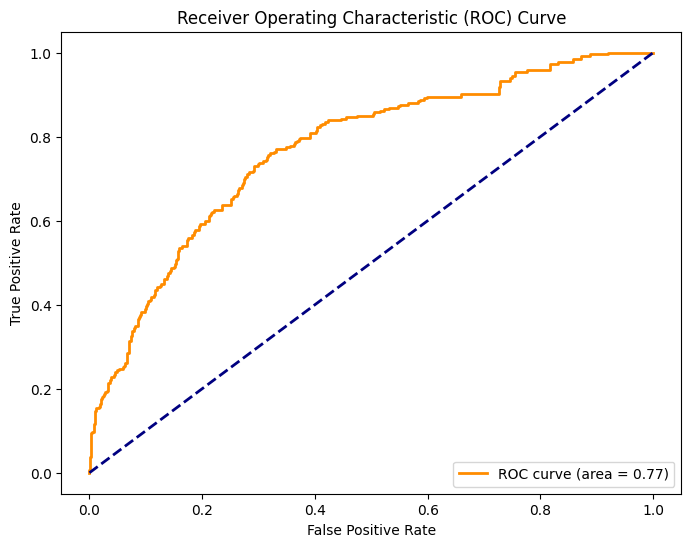

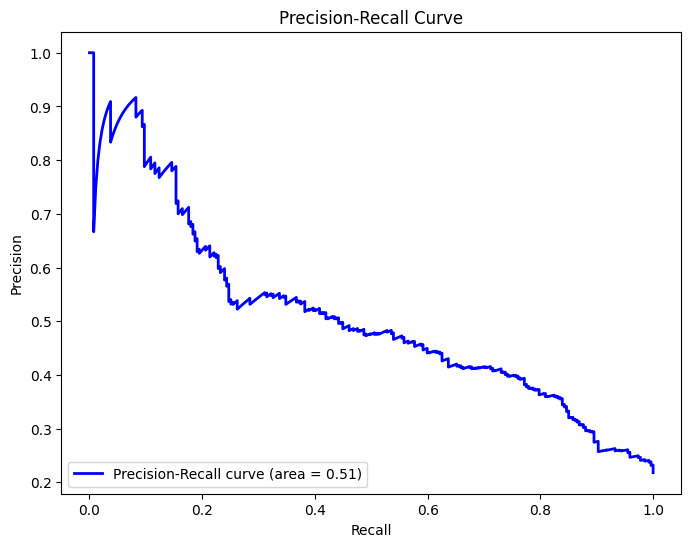

In [226]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC-AUC
fpr, tpr, thresholds_roc = roc_curve(y_validation_binary3, y_pred_3_pre)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_validation_binary3, y_pred_3_pre)
pr_auc = auc(recall, precision)

# Plot ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.show()


### &#x1F6E0;&#x26A1; **DEVELOPING CLASSIFICATION MODEL 2** &#x26A1;&#x1F6E0; <a id="#item-nine"></a>


For this model we are going to use regression trees.

### **4. Feature Selection/Engineering** &#x1F680; <a id="item-ten"></a>

In [227]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from dmba import plotDecisionTree, classificationSummary, regressionSummary


#### 4.1 Resampling Our Data

We are going to use oversampling methods as the proportion is imbalanced. 

According to researchs white wine quality can be categorized as good if the quality is 7 or superior
 

In [228]:
# Create the 'classification' column based on the 'quality' column
df_udemy_pre['classification'] = df_udemy_pre['quality'].apply(lambda x: 'good' if x >= 7 else 'regular')


In [229]:
# Assign the target variable
target_variable = df_udemy_pre['classification']

numerical_data_resampled = df_udemy_pre[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                     'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
                     'ph', 'sulphates', 'alcohol']]


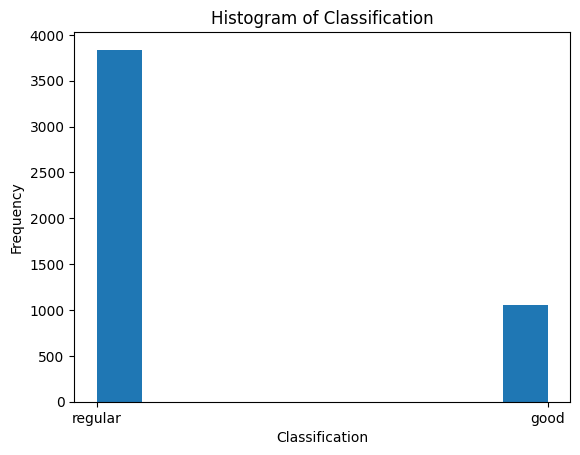

In [230]:
plt.hist(df_udemy_pre['classification'])

# Add labels and title
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.title('Histogram of Classification')

# Display the histogram
plt.show()

In [231]:
from imblearn.over_sampling import RandomOverSampler

# Define the oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the transformation
numerical_data_resampled, target_variable_resampled = oversample.fit_resample(numerical_data, target_variable)


In [232]:
print(target_variable_resampled.value_counts())


classification
regular    3838
good       3838
Name: count, dtype: int64


Now, lets compare the distribution of the balanced data and the unbalanced data

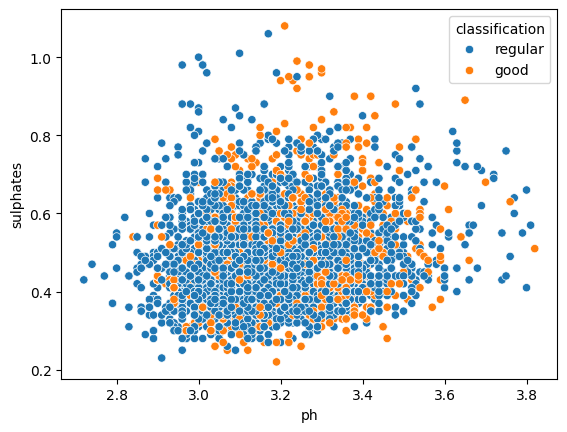

In [233]:
sns.scatterplot(x='ph', y='sulphates', data=df_udemy_pre, hue=target_variable_resampled)
plt.show()

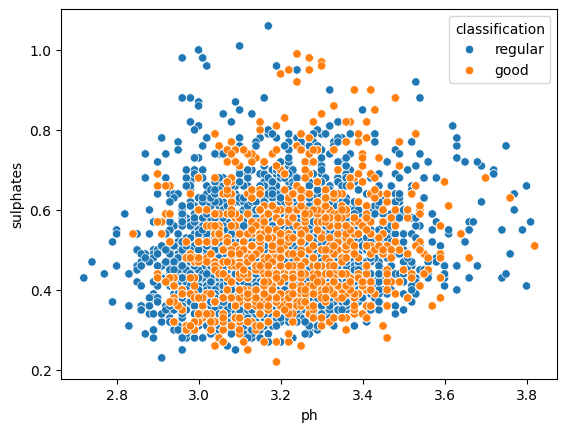

In [234]:
from sklearn.utils import resample

# Assuming 'target_variable' is your original unbalanced target variable
# Perform resampling to balance the classes
df_majority = df_udemy_pre[df_udemy_pre['classification'] == 'regular']
df_minority = df_udemy_pre[df_udemy_pre['classification'] == 'good']

# Upsample the minority class to match the majority class
df_minority_resampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine the resampled minority class with the majority class
df_resampled = pd.concat([df_majority, df_minority_resampled])

# Reset index for the combined DataFrame
df_resampled.reset_index(drop=True, inplace=True)

# Update the 'classification' column in the DataFrame based on 'quality'
df_resampled['classification'] = df_resampled['quality'].apply(lambda x: "good" if x >= 7 else "regular")

# Use the updated 'classification' column for the scatterplot
sns.scatterplot(x='ph', y='sulphates', data=df_resampled, hue='classification')
plt.show()


#### 4.2 Selection Features

selecting the final balanced variables

In [235]:
# Assign the target variable
target_variable = df_resampled['classification']

numerical_data_resampled = df_resampled[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                     'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
                     'ph', 'sulphates', 'alcohol']]


### **5. Model Selection** &#x1F680; <a id="item-eleven"></a>

* In this model we are using DecisionTreeClasifier

In [236]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(numerical_data_resampled, target_variable)

DecisionTreeClassifier(max_depth=1, random_state=0)

Classes: good, regular


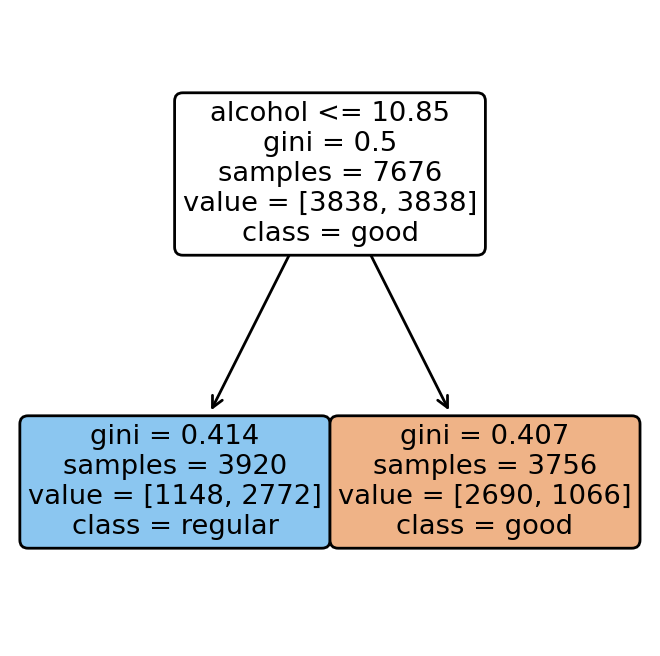

In [237]:
# Plot the tree
print("Classes: {}".format(', '.join(classTree.classes_)))

# Set dpi (100 - 300) to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)

tree.plot_tree(classTree,
           feature_names = df_resampled.columns, 
           class_names=classTree.classes_,
           filled = True,rounded=True)
plt.show()

* As we can see, the decision tree is well distributed 

### **6. Model Training** &#x1F680; <a id="item-twelve"></a>

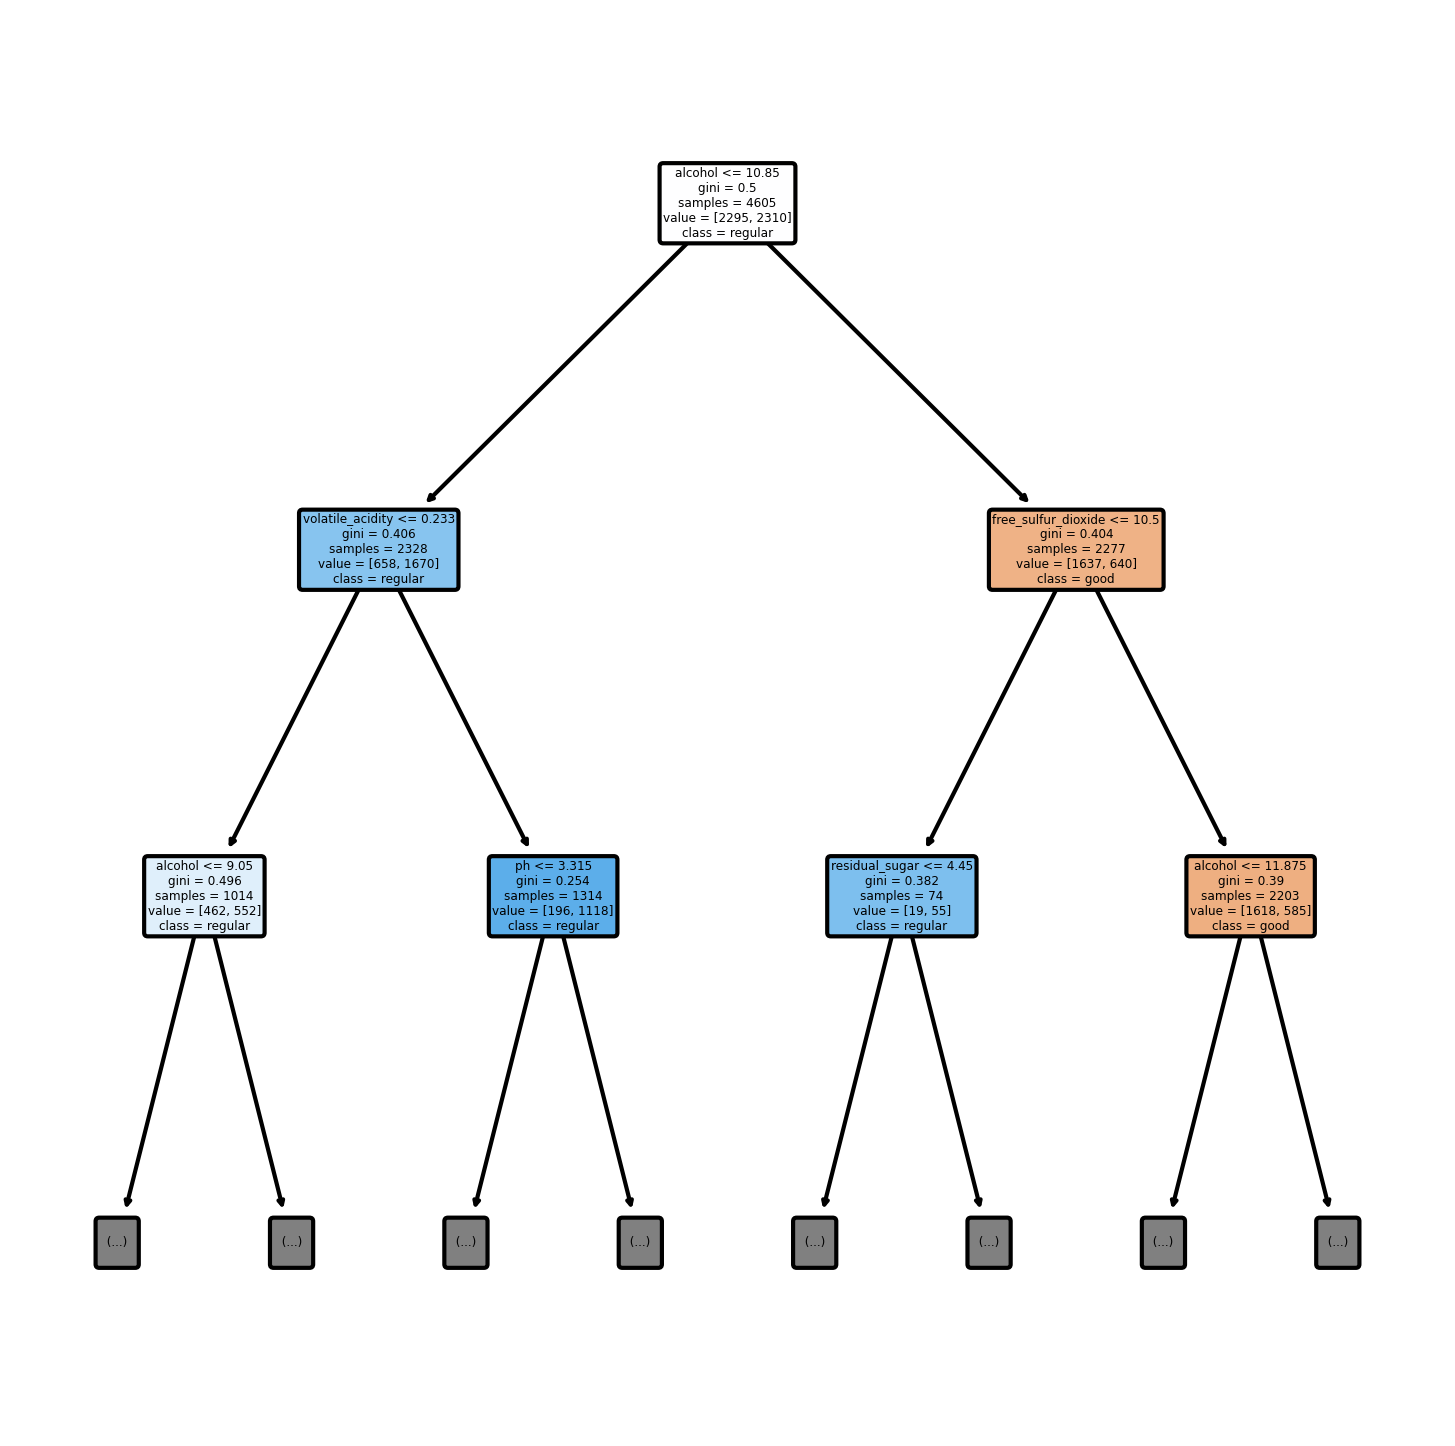

In [238]:
#split the data set
train_X, valid_X, train_y, valid_y = train_test_split(numerical_data_resampled, target_variable, test_size=0.4, random_state=1)

#fit the tree on training data
fullClassTree = DecisionTreeClassifier(
   max_depth=10, 
   min_samples_split=2, 
   min_samples_leaf=1, 
   max_features=None, 
   criterion='gini'
)
fullClassTree.fit(train_X, train_y)

#plot the tree
# Set dpi (100 - 300) to make image clearer than default

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

tree.plot_tree(fullClassTree,
               max_depth=2,
           feature_names = train_X.columns, 
           class_names=fullClassTree.classes_,
           filled = True,rounded=True);
plt.show()


In [239]:
from sklearn.metrics import  f1_score, recall_score

# Predict using the trained Decision Tree model
fullClassTree = DecisionTreeClassifier(
   max_depth=None, 
   min_samples_split=2, 
   min_samples_leaf=1, 
   max_features=None, 
   criterion='gini'

)
fullClassTree.fit(train_X, train_y)

# Predict using the trained Random Forest model
rf_predictions = fullClassTree.predict(train_X)  
rf_valid = fullClassTree.predict(valid_X)

classificationSummary(train_y, rf_predictions)
classificationSummary(valid_y, rf_valid)

# Calculate F1 score and recall for Random Forest
rf_f1_score = f1_score(train_y, rf_predictions, average='weighted')
rf_recall = recall_score(train_y, rf_predictions, average='weighted')

print("\nRandom Forest - F1 Score:", rf_f1_score)
print("Random Forest - Recall Score:", rf_recall)



Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2295    0
     1    0 2310
Confusion Matrix (Accuracy 0.9134)

       Prediction
Actual    0    1
     0 1498   45
     1  221 1307

Random Forest - F1 Score: 1.0
Random Forest - Recall Score: 1.0


* As the model is overfitting, we will try to tune the hyperparameters to improve the model performance.

In [240]:
# Five-fold cross-validation of the full decision tree classifier
rfClassifier = DecisionTreeClassifier()

scores = cross_val_score(rfClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])

Accuracy scores of each fold:  ['0.887', '0.882', '0.894', '0.891', '0.900']


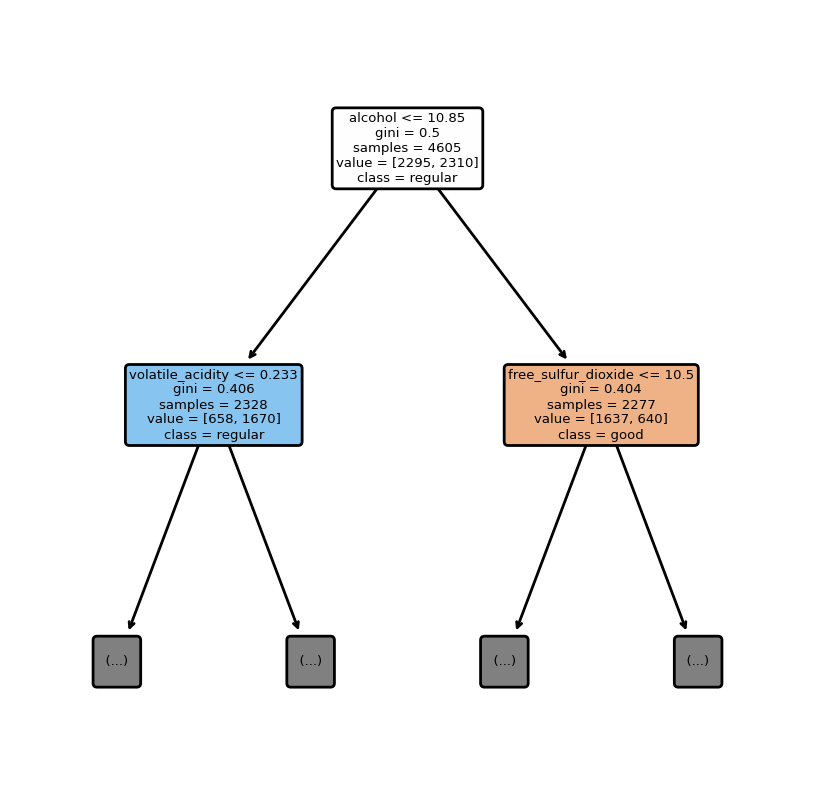

In [241]:
smallDecisionTree = DecisionTreeClassifier(max_depth=None, min_samples_split=20, min_impurity_decrease=0.0001)
smallDecisionTree.fit(train_X, train_y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=200)

tree.plot_tree(smallDecisionTree,
           max_depth=1,
           feature_names = train_X.columns, 
           class_names=smallDecisionTree.classes_,
           filled = True,rounded=True);
plt.show()

### **7. Pattern Discovery** &#x1F680; <a id="item-thirteen"></a>

                 Feature  Importance
10               alcohol    0.314631
1       volatile_acidity    0.095044
8                     ph    0.080641
7                density    0.077281
4              chlorides    0.074810
0          fixed_acidity    0.070537
6   total_sulfur_dioxide    0.066047
5    free_sulfur_dioxide    0.058507
3         residual_sugar    0.057696
9              sulphates    0.054312
2            citric_acid    0.050492


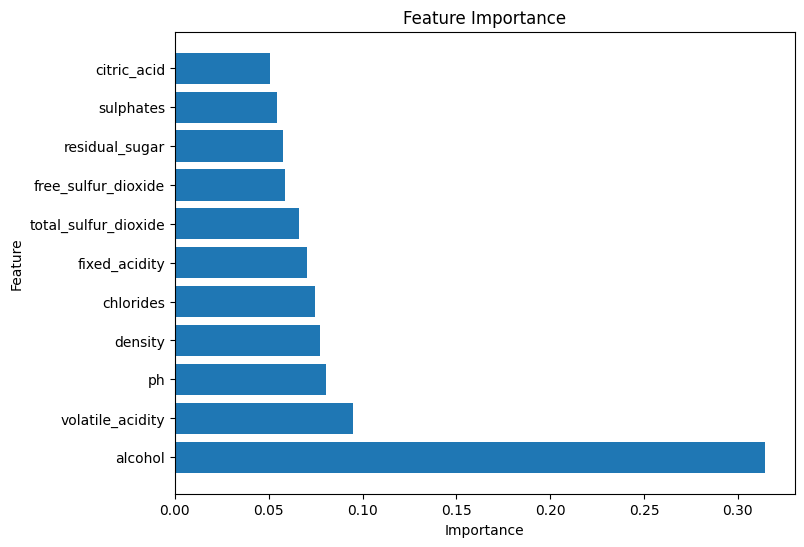

In [242]:
# Extract feature importances
importances = smallDecisionTree.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': train_X.columns,
    'Importance': importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df)

# Plotting feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


### **8. Model Evaluation** &#x1F680; <a id="item-twenty-one"></a>

In [243]:
classificationSummary(train_y, smallDecisionTree.predict(train_X))
classificationSummary(valid_y, smallDecisionTree.predict(valid_X))

# Calculate F1 score and recall for Random Forest
rf_f1_scores = f1_score(train_y, smallDecisionTree.predict(train_X), average='weighted')
rf_recalls = recall_score(train_y, smallDecisionTree.predict(train_X), average='weighted')

print("\nRandom Forest - F1 Score:", rf_f1_scores)
print("Random Forest - Recall Score:", rf_recalls)

Confusion Matrix (Accuracy 0.9370)

       Prediction
Actual    0    1
     0 2160  135
     1  155 2155
Confusion Matrix (Accuracy 0.8587)

       Prediction
Actual    0    1
     0 1367  176
     1  258 1270

Random Forest - F1 Score: 0.9370246758876246
Random Forest - Recall Score: 0.9370249728555917


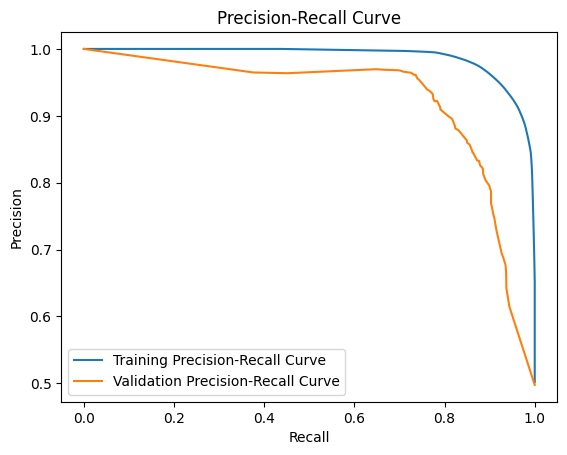

In [244]:
from sklearn.preprocessing import LabelEncoder

# Encoding target variables to binary values
label_encoder = LabelEncoder()
train_y_encoded = label_encoder.fit_transform(train_y)
valid_y_encoded = label_encoder.transform(valid_y)

# Calculate precision and recall
train_precision, train_recall, _ = precision_recall_curve(train_y_encoded, smallDecisionTree.predict_proba(train_X)[:, 1])
valid_precision, valid_recall, _ = precision_recall_curve(valid_y_encoded, smallDecisionTree.predict_proba(valid_X)[:, 1])

# Plot Precision-Recall curve
plt.plot(train_recall, train_precision, label='Training Precision-Recall Curve')
plt.plot(valid_recall, valid_precision, label='Validation Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


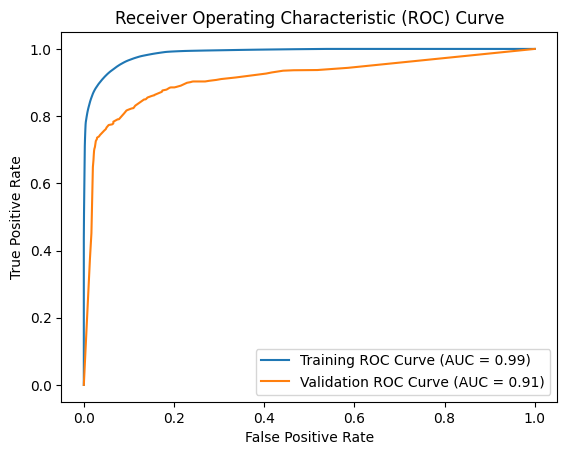

In [245]:
from sklearn.metrics import roc_curve, auc

# Calculate false positive rate and true positive rate
train_fpr, train_tpr, _ = roc_curve(train_y_encoded, smallDecisionTree.predict_proba(train_X)[:, 1])
valid_fpr, valid_tpr, _ = roc_curve(valid_y_encoded, smallDecisionTree.predict_proba(valid_X)[:, 1])

# Calculate AUC (Area Under the Curve)
train_auc = auc(train_fpr, train_tpr)
valid_auc = auc(valid_fpr, valid_tpr)

# Plot ROC curve
plt.plot(train_fpr, train_tpr, label=f'Training ROC Curve (AUC = {train_auc:.2f})')
plt.plot(valid_fpr, valid_tpr, label=f'Validation ROC Curve (AUC = {valid_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### &#x1F6E0;&#x26A1; **DEVELOPING CLASSIFICATION MODEL 3** &#x26A1;&#x1F6E0; <a id="item-fourteen"></a>

&#x1F4DA;&#x1F4DA; **About this third model:** 
* For the development of this third classification model to address the problem defined in step 1, we will use Random Forest algorithms.

### **4. Feature Selection/Engineering** &#x1F680; <a id="item-fiveteen"></a>

For this model we are going to work with the same variables of the 2nd model

### **5. Model Selection** &#x1F680; <a id="item-sixteen"></a>

We are going to use RandomForestClassifier for instance of this exercise

In [246]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### **6. Model Training** &#x1F680; <a id="item-seventeen"></a>

In [247]:
# Split the data set
train_XRF, valid_XRF, train_yRF, valid_yRF = train_test_split(numerical_data_resampled, target_variable, test_size=0.4, random_state=1)

# Fit the Random Forest on training data
randomForest = RandomForestClassifier(
    n_estimators=100,  # Set the number of trees (adjust as needed)
    random_state=0,
    max_depth=8,
    min_samples_split=2,
    min_samples_leaf=3,
    max_features=None,
    criterion='gini'
)
randomForest.fit(train_XRF, train_yRF)

# Predict using the trained Random Forest model
rf_predictions = randomForest.predict(train_XRF)
rf_valid = randomForest.predict(valid_XRF)


### **7. Pattern Discovery** &#x1F680; <a id="item-eighteen"></a>

                 Feature  Importance
10               alcohol    0.382949
1       volatile_acidity    0.118621
8                     ph    0.076883
5    free_sulfur_dioxide    0.067723
7                density    0.063890
4              chlorides    0.062096
3         residual_sugar    0.057478
9              sulphates    0.045256
6   total_sulfur_dioxide    0.044671
0          fixed_acidity    0.042893
2            citric_acid    0.037539


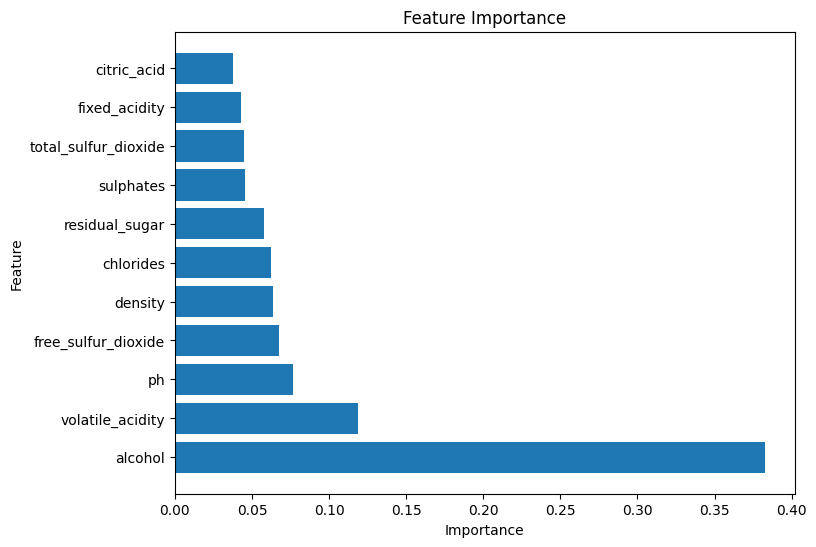

In [248]:
# Extract feature importances
importances = randomForest.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': train_X.columns,
    'Importance': importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df)

# Plotting feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


### **8. Model Evaluation** &#x1F680; <a id="twenty-two"></a>

In [249]:
# Display classification summary
print("Training Set:")
print(classification_report(train_yRF, rf_predictions))
print("\nValidation Set:")
print(classification_report(valid_yRF, rf_valid))

# Calculate F1 score and recall for Random Forest
rf_f1_score = f1_score(train_yRF, rf_predictions, average='weighted')
rf_recall = recall_score(train_yRF, rf_predictions, average='weighted')

print("\nRandom Forest - F1 Score:", rf_f1_score)
print("Random Forest - Recall Score:", rf_recall)

Training Set:
              precision    recall  f1-score   support

        good       0.87      0.97      0.92      2295
     regular       0.97      0.85      0.91      2310

    accuracy                           0.91      4605
   macro avg       0.92      0.91      0.91      4605
weighted avg       0.92      0.91      0.91      4605


Validation Set:
              precision    recall  f1-score   support

        good       0.81      0.93      0.87      1543
     regular       0.92      0.78      0.84      1528

    accuracy                           0.86      3071
   macro avg       0.86      0.86      0.85      3071
weighted avg       0.86      0.86      0.85      3071


Random Forest - F1 Score: 0.9115162545440137
Random Forest - Recall Score: 0.9118349619978284


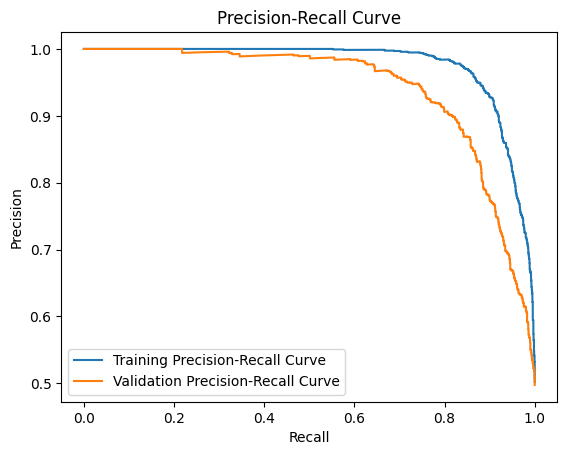

In [250]:
from sklearn.preprocessing import LabelEncoder

# Encoding target variables to binary values
label_encode = LabelEncoder()
train_y_encoded = label_encoder.fit_transform(train_yRF)
valid_y_encoded = label_encoder.transform(valid_yRF)

# Calculate precision and recall
train_precision, train_recall, _ = precision_recall_curve(train_y_encoded, randomForest.predict_proba(train_XRF)[:, 1])
valid_precision, valid_recall, _ = precision_recall_curve(valid_y_encoded, randomForest.predict_proba(valid_XRF)[:, 1])

# Plot Precision-Recall curve
plt.plot(train_recall, train_precision, label='Training Precision-Recall Curve')
plt.plot(valid_recall, valid_precision, label='Validation Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


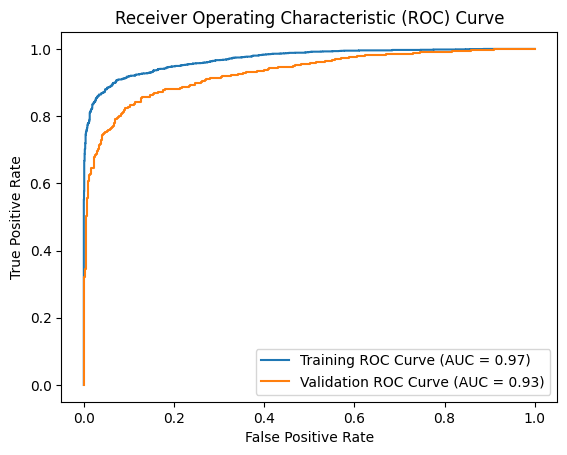

In [251]:
from sklearn.metrics import roc_curve, auc

# Calculate false positive rate and true positive rate
train_fpr, train_tpr, _ = roc_curve(train_y_encoded, randomForest.predict_proba(train_XRF)[:, 1])
valid_fpr, valid_tpr, _ = roc_curve(valid_y_encoded, randomForest.predict_proba(valid_XRF)[:, 1])

# Calculate AUC (Area Under the Curve)
train_auc = auc(train_fpr, train_tpr)
valid_auc = auc(valid_fpr, valid_tpr)

# Plot ROC curve
plt.plot(train_fpr, train_tpr, label=f'Training ROC Curve (AUC = {train_auc:.2f})')
plt.plot(valid_fpr, valid_tpr, label=f'Validation ROC Curve (AUC = {valid_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### **9. Interpretation and Application** &#x1F680; <a id="item-twenty-three"></a>

### 9.1. Interpretation:

### Model Performance Comparison:

#### Random Forest
- **Recall Score:** 0.9118
- **Accuracy:** 0.86
- **ROC:** 0.93

#### Decision Tree
- **Recall Score:** 0.9355
- **Accuracy:** 0.8535
- **ROC:** 0.91

#### Logistic Regression
- **Recall Score:** 0.51
- **Accuracy:** 0.79
- **ROC:** 0.77

### Model Analysis:

- **Recall Score:** Decision Tree has the highest recall score, indicating better performance in correctly identifying positive cases.
- **Accuracy:** Random Forest has the highest accuracy among the models.
- **ROC:** Random Forest also demonstrates the highest ROC value, signifying its better ability to distinguish between classes.

### Conclusion:
- Based on the provided metrics, the Decision Tree model exhibits the highest recall score, while the Random Forest model displays the best accuracy and ROC score. Depending on the specific priority (e.g., emphasis on recall or overall accuracy), the choice of the best model may vary.



### 9.2. Application:

### Real-world Applications Based on Model Insights:

#### Random Forest Feature Importance:
1. **Alcohol:** Identified as the most influential feature in predicting wine quality, suggesting that alcohol content has the highest impact.
2. **Volatile Acidity:** This feature follows alcohol in importance, indicating that higher levels of volatile acidity can significantly affect wine quality.
3. **pH and Density:** pH and density also play crucial roles in determining wine quality, albeit with slightly lower importance.

#### Decision Tree Feature Importance:
1. **Alcohol:** Similarly, alcohol content emerges as the most important feature in the Decision Tree model.
2. **Volatile Acidity:** Follows alcohol as the second most important feature, aligning with the Random Forest results.
3. **pH, Density, and Chlorides:** These features also exhibit considerable importance in the Decision Tree model, much like the Random Forest.

### Insights:
- **Consistent Top Features:** Both models consistently identify alcohol and volatile acidity as crucial factors in predicting wine quality.
- **Additional Features:** pH, density, and chlorides also consistently appear among the top influential features across the models.

### Real-world Implications:
1. **Quality Enhancement:** Wineries can focus on alcohol levels and volatile acidity to improve wine quality.
2. **Quality Control:** Monitoring pH, density, and chlorides can aid in quality control processes during wine production.

### Conclusion:
- **Robust Features:** The alignment in top features across models reinforces the importance of these factors in determining wine quality, offering actionable insights for winemaking processes.
